In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Hàm hiển thị ảnh
def display_image(data, title, cmap='gray', vmin=None, vmax=None):
    plt.figure()
    plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.colorbar()
    plt.show()

# Hàm lưu ảnh
def save_image(data, filename, cmap='gray', vmin=None, vmax=None):
    plt.figure()
    plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.axis('off')  # Tắt các trục
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()  # Đảm bảo không giữ các hình vẽ mở

In [3]:
# Bước 1: Khởi tạo các hằng số và thông số
size = 8  # Kích thước ảnh (8x8)
TwoPiOnSize = 2.0 * np.pi / size  # 2 * pi / size
u0 = v0 = 2.0  # Tần số ngang và dọc

In [4]:
# Bước 2: Tạo các mảng cho phần thực và ảo
I3R = np.zeros((size, size), dtype=float)  # Phần thực của I3
I3I = np.zeros((size, size), dtype=float)  # Phần ảo của I3

In [5]:
# Bước 3: Tính toán các giá trị pixel
for row in range(size):
    for col in range(size):
        Phase = TwoPiOnSize * (u0 * col + v0 * row)
        I3R[row, col] = np.cos(Phase)  # Phần thực
        I3I[row, col] = 0.0  # Phần ảo bằng 0

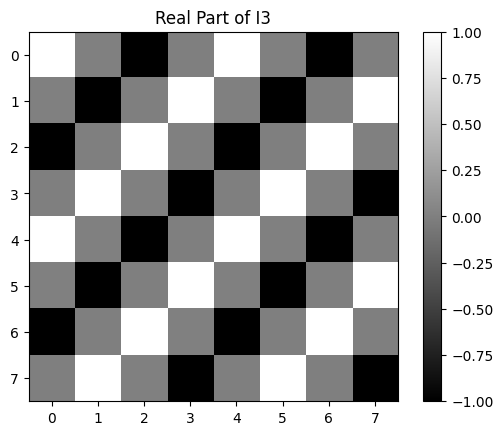

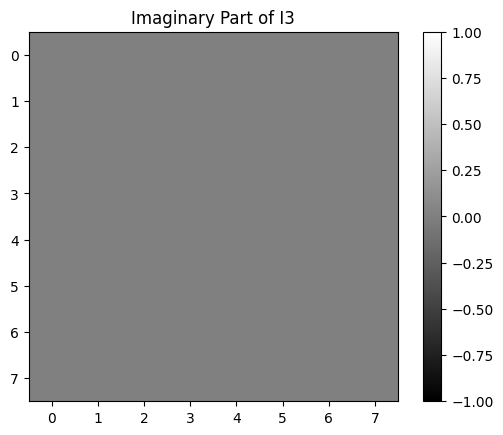

In [6]:
# Bước 4: Hiển thị ảnh phần thực và phần ảo của I3
display_image(I3R, 'Real Part of I3', cmap='gray', vmin=-1, vmax=1)
display_image(I3I, 'Imaginary Part of I3', cmap='gray', vmin=-1, vmax=1)

# Lưu ảnh phần thực và phần ảo của I3
save_image(I3R, 'real_I3.png', cmap='gray', vmin=-1, vmax=1)
save_image(I3I, 'imag_I3.png', cmap='gray', vmin=-1, vmax=1)

In [7]:
# Bước 5: Tính FFT 2D
DFT_I3 = np.fft.fftshift(np.fft.fft2(I3R + 1j * I3I))

In [8]:
# Tách phần thực và phần ảo của FFT
real_DFT_I3 = np.real(DFT_I3)
imag_DFT_I3 = np.imag(DFT_I3)

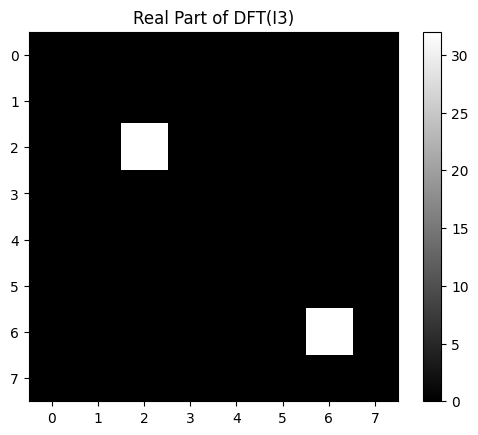

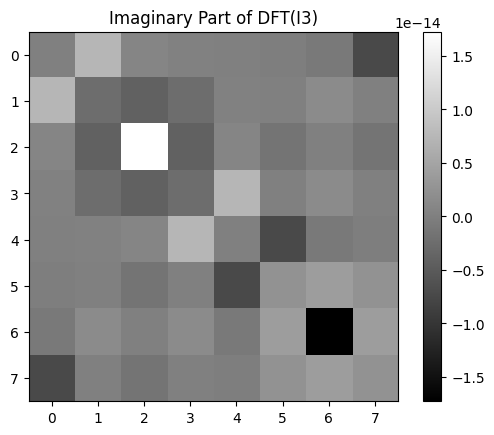

In [9]:
# Hiển thị FFT
display_image(real_DFT_I3, 'Real Part of DFT(I3)', cmap='gray')
display_image(imag_DFT_I3, 'Imaginary Part of DFT(I3)', cmap='gray')

# Lưu ảnh FFT phần thực và phần ảo của DFT(I3)
save_image(real_DFT_I3, 'real_DFT_I3.png', cmap='gray')
save_image(imag_DFT_I3, 'imag_DFT_I3.png', cmap='gray')

In [10]:
# Bước 6: In ra các giá trị ASCII
print("Re[DFT(I3)]:")
print(np.round(real_DFT_I3, 4))

print("\nIm[DFT(I3)]:")
print(np.round(imag_DFT_I3, 4))

Re[DFT(I3)]:
[[ 0. -0. -0. -0.  0. -0. -0. -0.]
 [-0. -0.  0.  0.  0.  0.  0.  0.]
 [-0.  0. 32. -0.  0. -0.  0.  0.]
 [-0. -0. -0.  0.  0. -0. -0.  0.]
 [ 0.  0.  0.  0. -0.  0.  0.  0.]
 [-0.  0. -0. -0.  0.  0. -0. -0.]
 [-0.  0.  0. -0.  0. -0. 32.  0.]
 [-0.  0.  0.  0.  0.  0.  0. -0.]]

Im[DFT(I3)]:
[[ 0.  0.  0.  0.  0. -0. -0. -0.]
 [ 0. -0. -0. -0.  0.  0.  0.  0.]
 [ 0. -0.  0. -0.  0. -0.  0. -0.]
 [ 0. -0. -0. -0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -0. -0. -0.]
 [-0.  0. -0. -0. -0.  0.  0.  0.]
 [-0.  0.  0.  0. -0.  0. -0.  0.]
 [-0. -0. -0.  0. -0.  0.  0.  0.]]
